In [2]:
from Bio import SeqIO
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
import numpy as np

import re
from collections import defaultdict

In [3]:
seqdict = {}
for record in SeqIO.parse('../data/seqs/cypriniformes_augustus_finz.fa', 'fasta'):
    seqdict[record.id] = str(record.seq)

In [4]:
seqlens = [(key, len(val)) for key, val in seqdict.items()]
length_df = pd.DataFrame(seqlens, columns=['name', 'length'])
print(length_df.head())

                         name  length
0  Anabarilius_grahami_g16.t1     485
1  Anabarilius_grahami_g18.t1     201
2  Anabarilius_grahami_g20.t1     399
3  Anabarilius_grahami_g21.t1     425
4  Anabarilius_grahami_g23.t1     334


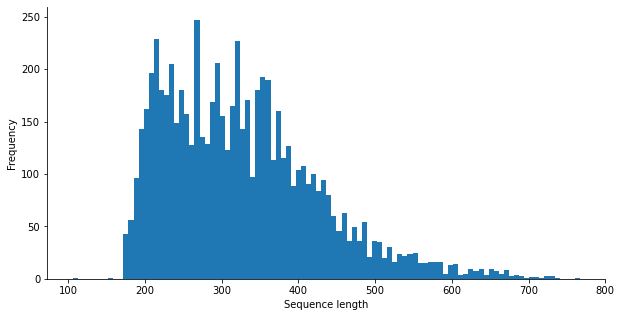

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(length_df.length, bins=100)
ax.set_xlabel('Sequence length')
ax.set_ylabel('Frequency')
sns.despine()
plt.show()

In [35]:
gff_files = {'newannots': '../data/gffs/denovo_finz_znf.gff',
             'ensembl': '../data/gffs/ensembl_finz_znf.gff',
             'refseq': '../data/gffs/refseq_finz_znf.gff'}

gff_files = {'newannots': '../data/gffs/denovo_finz_znf.gff'}
exondict = defaultdict(int)

for source, filename in gff_files.items():
    with open(filename) as infile:
        for line in infile:
            if re.match('#', line):
                continue
            if re.search('\tCDS\t', line):
                try:
                    gene = re.search('ID=(.+)?\.cds;', line).group(1)
                    exondict[f'{gene}'] += 1
                except:
                    print(line)

exon_df = pd.DataFrame([(key, val) for key, val in exondict.items()], columns=['gene', 'exons'])
exon_df['species'] = 'Danio_rerio'
print(exon_df.head())
print(exon_df.loc[exon_df.species == 'Danio_rerio'].sort_values('exons'))

     gene  exons      species
0   g9.t1      2  Danio_rerio
1  g10.t1      2  Danio_rerio
2  g12.t1      3  Danio_rerio
3  g13.t1      4  Danio_rerio
4  g19.t1      2  Danio_rerio
         gene  exons      species
0       g9.t1      2  Danio_rerio
414  g1422.t1      2  Danio_rerio
413  g1421.t1      2  Danio_rerio
412  g1415.t1      2  Danio_rerio
410  g1396.t1      2  Danio_rerio
..        ...    ...          ...
190   g643.t1     10  Danio_rerio
328  g1080.t1     10  Danio_rerio
93    g283.t1     10  Danio_rerio
570  g1946.t1     12  Danio_rerio
262   g871.t1     13  Danio_rerio

[816 rows x 3 columns]


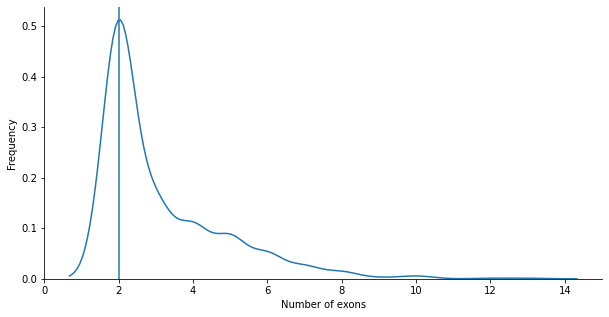

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
# ax.hist(exon_df.exons, bins=len(set(exon_df.exons)), density=True)
# dist.plot.kde(exon_df.exons, ax=ax)
sns.kdeplot(exon_df.loc[exon_df.species == 'Danio_rerio'].exons)
plt.axvline(exon_df.loc[exon_df.species == 'Danio_rerio', 'exons'].median())
ax.set_xlabel('Number of exons')
ax.set_ylabel('Frequency')
sns.despine()
plt.show()


In [36]:
exon_df.loc[exon_df.exons == 2].gene.to_csv('../data/test.txt', index=False, header=False)

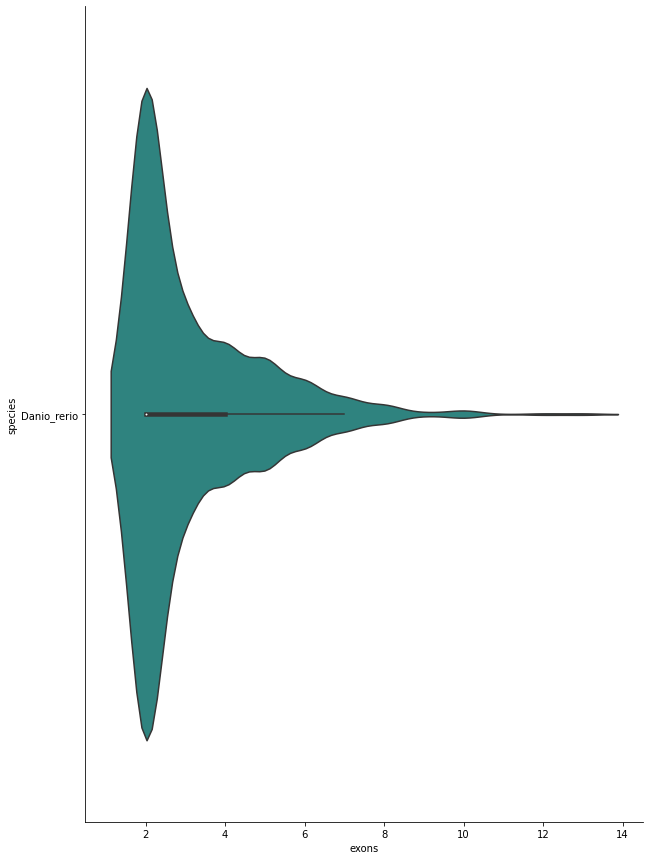

In [27]:
sortorder = exon_df.groupby('species').median().reset_index().sort_values('exons').species.tolist()
fig, ax = plt.subplots(figsize=(10, 15))
sns.violinplot(data=exon_df, x='exons', y='species', order=sortorder, palette='viridis')
sns.despine()
plt.show()

TypeError: venn3() got an unexpected keyword argument 'linestyle'

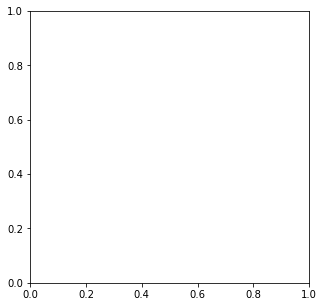

In [11]:
with open('../data/finz_znf_overlap_70.txt') as infile:
    overlap = [int(line.split()[-1]) for line in infile]
# (A, B, AB, C, AC, BC, ABC)
fig, ax = plt.subplots(figsize=(5, 5))
venn3(subsets=overlap, 
      set_labels=('de novo', 'Ensembl', 'RefSeq'), 
      set_colors=('purple', 'dodgerblue', 'orange'), linestyle='-')
plt.show()


In [7]:
print(+171+71+62)
print(122+171+71+57)
print(62+71+57+80)

816
421
270
